# Explainable AI using diabetes dataset 
# SHAP and LIME

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
import pandas as pd

In [2]:
diabetes = pd.read_csv('diabetes.csv')

In [3]:
X = diabetes.drop(columns='Outcome')
y = diabetes['Outcome']

In [4]:
# train / test split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,
                                                	stratify =y,
                                                	random_state = 13)

### Build random forest classifier on diabetes data

In [5]:
rf_clf = RandomForestClassifier(max_features=2, n_estimators =100 ,bootstrap = True)

In [6]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_features=2)

### Predict using RF model on test set

In [7]:
# Predict on test data
y_pred = rf_clf.predict(X_test)

### Random forest metrics

In [8]:
# Use sklearn metrics classification report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83       165
           1       0.57      0.70      0.63        66

    accuracy                           0.76       231
   macro avg       0.72      0.74      0.73       231
weighted avg       0.78      0.76      0.77       231



### Explaining using SHAP

In [10]:
# !pip install shap

In [18]:
import shap
import matplotlib.pyplot as plt
import numpy as np

In [19]:
# this allows us to show the javascript viz in our jupyter notebook
shap.initjs()

In [69]:
# Create the explainer
explainer = shap.TreeExplainer(rf_clf)
shap_values = explainer(X_test)

In [76]:
shap.force_plot(explainer.expected_value, shap_values
            )

TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[..., 0]).

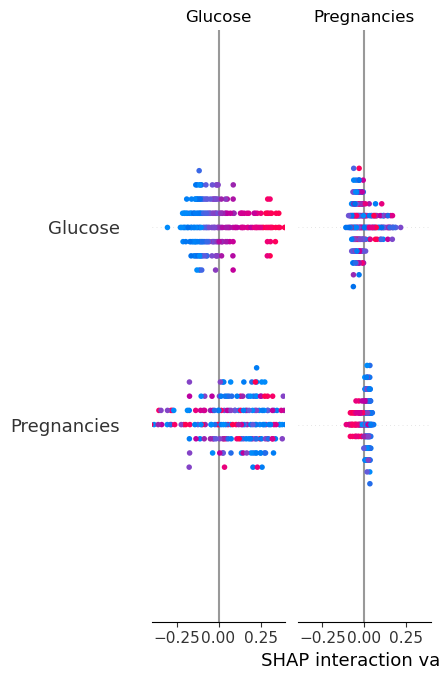

In [65]:
# Bar plot of global feature importance
shap.summary_plot(shap_values, X_test,  plot_type="bar")

In [66]:
shap.summary_plot(shap_values[1], X_test)

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

### Explaining a single instance using LIME

In [41]:
# ! pip install lime

In [42]:
from lime.lime_tabular import LimeTabularExplainer

In [43]:
class_names = ['diabetes', 'no diabetes']
feature_names = list(X_train.columns)

In [44]:
# Fit the Explainer on the training data set using the LimeTabularExplainer
explainer = LimeTabularExplainer(X_train.values, feature_names =     
                                 feature_names,
                                 class_names = class_names, 
                                 mode = 'classification')

In [50]:
# Pick any instance from the test set
i = 7  # example row index

exp = explainer.explain_instance(
    data_row = X_test.values[i],
    predict_fn = rf_clf.predict_proba,  # probability function
    num_features = X_train.shape[1]
)

/opt/conda/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [51]:
exp.show_in_notebook(show_table=True)

### How tree classification works, visualized

In [47]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt_clf = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 2)
dt_clf.fit(X_train, y_train)

# Predict on the test data and evaluate the model
y_pred = dt_clf.predict(X_test)

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80       181
           1       0.41      0.66      0.50        50

    accuracy                           0.72       231
   macro avg       0.65      0.70      0.65       231
weighted avg       0.78      0.72      0.74       231



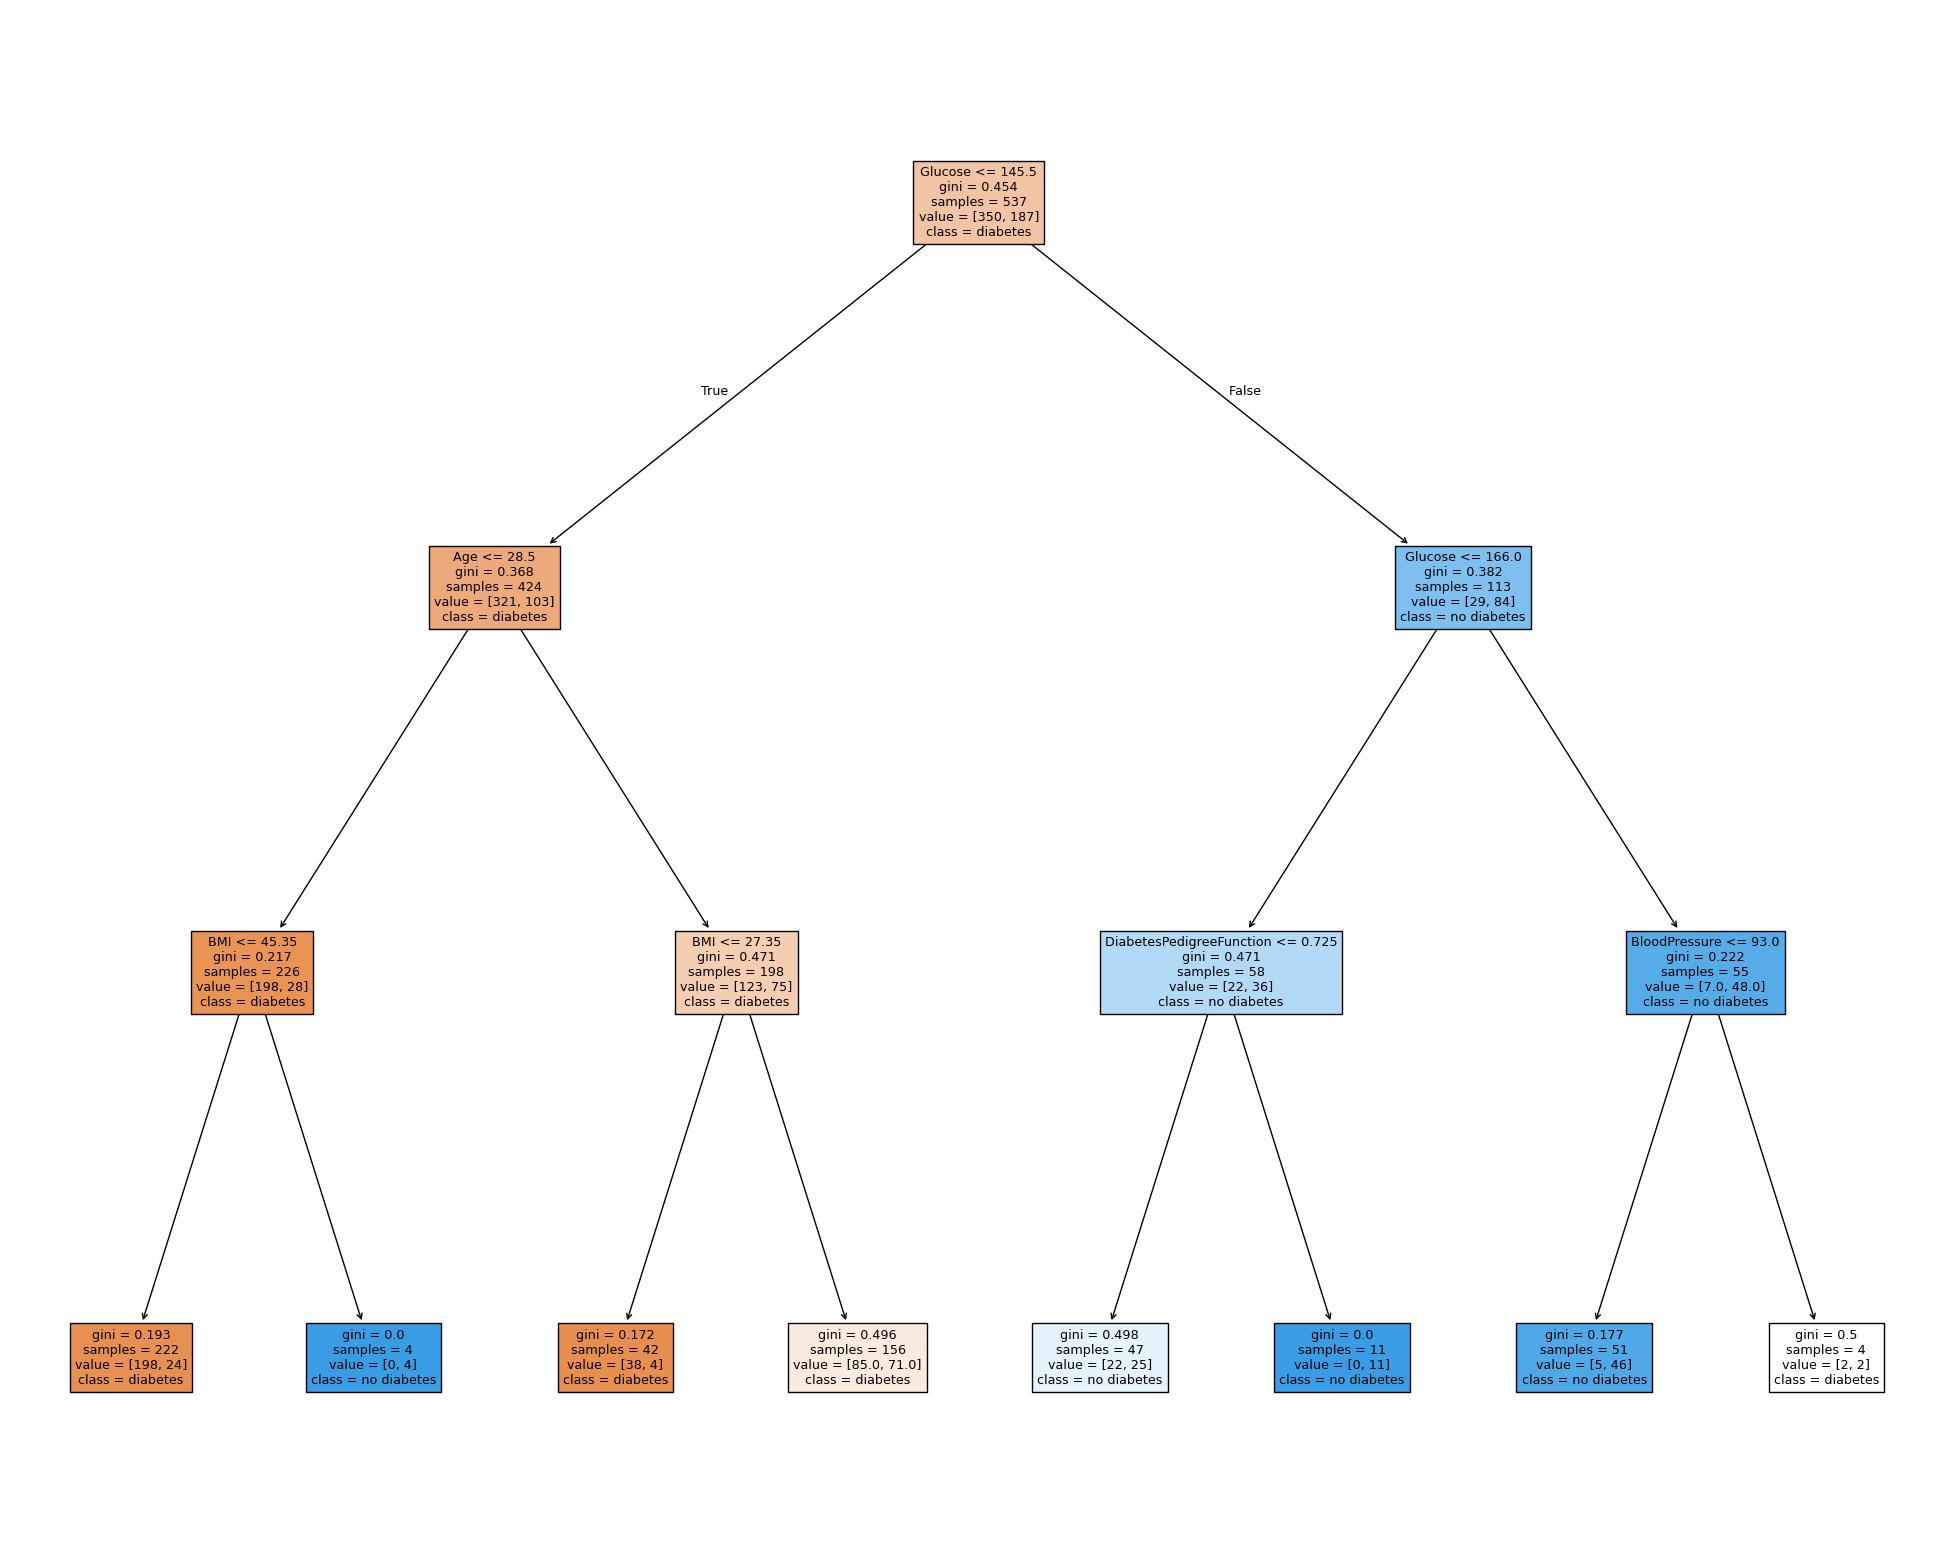

In [48]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(dt_clf,
               	feature_names = feature_names,
               	class_names = class_names,
               	filled=True)